**Aquí voy a probar todas las funcionalidades necesarias para hacer la librería de funciones que voy a ir reutilizando.  
Va a tener las siguientes partes:**  
1. Utils:   
    1. **Datos**: Funcionalidad de carga de datos, además de seleciones que no modifique los datos.
    2. **Preprocess**: Cosas como normalizacion, o algunas formas de reordenar u obtener transformaciones de los datos.  
    3. **PostProcess**: Para la parte de manejar los resultados.   
    4. **Vizutils**: Es una forma de crear representaciones sobre los datos finales o los inciales.   

2. **Models**:  Toda la parte de modelos, tanto para DNN, como las variantes de PINNs y GNN...  Añadir la opcion de selfadaptative weight en la loss.
3. **Train**: Utilidades que hacen el entrenamiento y tal. No creo que haya mucha complegidad aquí.

In [1]:
import os 
BASE_DIR=os.path.abspath("../../")

In [10]:
import sys 
sys.path.append(BASE_DIR)
DATA_DIR="/home/arturosf/Documentos/repos/DeepElasticity/data/001-LinearElasticity"

In [11]:
from src.utils.data import Data
from src.models import PINN  
from src.train import Trainer
import torch 
import matplotlib.pyplot as plt 

In [12]:
data=Data("MULTIPLE_E_VALUES",10,E="0.005",base_dir=DATA_DIR)


In [13]:
data.load_data()

In [14]:
train_init_pos_main,train_disp_main,test_init_pos_main,test_disp_main,position_selected_stresses,return_stress,return_colloc_points=data.prepare_pytorch_data()

/home/arturosf/miniconda3/envs/pinns/lib/python3.10/site-packages/torch/cuda/__init__.py:611: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [15]:
init_values={"nu":.4,"alpha":1.1,"E_ref":0.05}
pinn=PINN([3,24,24,24,3],init_values,loss_weights_init={"data":1,"PDE":1,"BC":1})

/home/arturosf/Documentos/repos/DeepElasticity/src/models.py:93: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.E = torch.tensor((1+self.alpha)*self.E_ref,dtype=torch.float32).to(self.device)


In [10]:
# opt=torch.optim.Adam(pinn.parameters(),lr=1e-3)
# for epoch in range(700):
#     loss=pinn.loss(train_init_pos_main,train_disp_main,return_colloc_points,position_selected_stresses,return_stress)
#     print("Epoch: ", epoch, "loss: ", loss.item())
#     loss.backward()
#     opt.step()
#     opt.zero_grad()

In [37]:
init_values={"nu":.4,"alpha":0.1,"E_ref":0.05}
pinn=PINN([3,10,10,10,10,10,10,10,10,3],init_values,loss_weights_init={"data":1,"PDE":1e4,"BC":1e5})


/home/arturosf/Documentos/repos/DeepElasticity/src/models.py:93: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.E = torch.tensor((1+self.alpha)*self.E_ref,dtype=torch.float32).to(self.device)


In [39]:
step_dict = {
    "step_1": {"optim": torch.optim.Adam(pinn.parameters(), lr=1e-2), 
               "epochs": 100},
    "step_2": {"optim": torch.optim.Adam(pinn.parameters(), lr=1e-3), 
               "epochs": 1700}
    }
trainer=Trainer(step_dict)

In [40]:
trainer.train(pinn,data)

step_1
Epoch:  1 loss:  4.5058794021606445
Epoch:  2 loss:  4.604616165161133
Epoch:  3 loss:  4.385525703430176
Epoch:  4 loss:  4.297366619110107
Epoch:  5 loss:  4.230166435241699
Epoch:  6 loss:  4.168362617492676
Epoch:  7 loss:  4.11290979385376
Epoch:  8 loss:  4.062946796417236
Epoch:  9 loss:  4.01785945892334
Epoch:  10 loss:  3.9757659435272217
Epoch:  11 loss:  3.9358818531036377
Epoch:  12 loss:  3.8978655338287354
Epoch:  13 loss:  3.8615972995758057
Epoch:  14 loss:  3.827054738998413
Epoch:  15 loss:  3.794255495071411
Epoch:  16 loss:  3.763213634490967
Epoch:  17 loss:  3.733917236328125
Epoch:  18 loss:  3.7063217163085938
Epoch:  19 loss:  3.6803646087646484
Epoch:  20 loss:  3.6559643745422363
Epoch:  21 loss:  3.6330227851867676
Epoch:  22 loss:  3.6114308834075928
Epoch:  23 loss:  3.591078042984009
Epoch:  24 loss:  3.5718698501586914
Epoch:  25 loss:  3.5537304878234863
Epoch:  26 loss:  3.536611557006836
Epoch:  27 loss:  3.5204906463623047
Epoch:  28 loss:  3

KeyboardInterrupt: 

In [34]:
pinn.params_history.keys()

dict_keys(['E', 'alpha'])

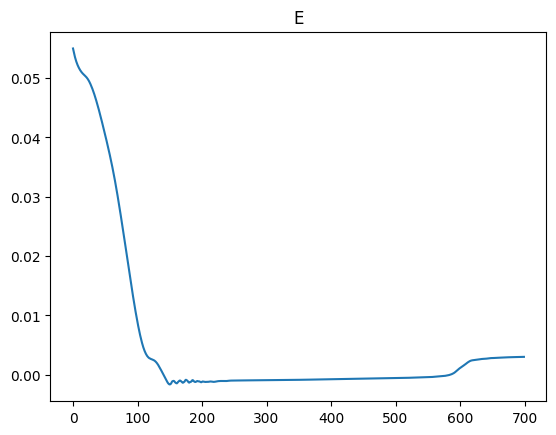

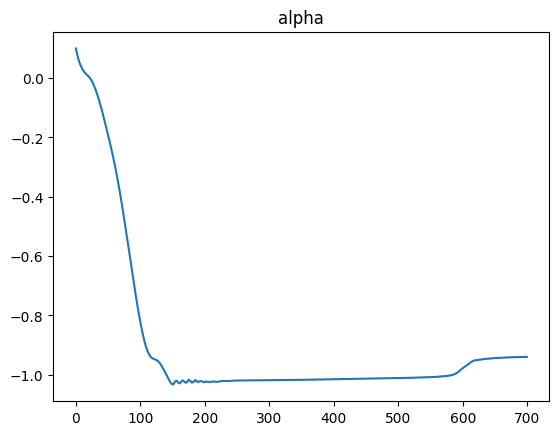

In [35]:
for i in pinn.params_history.keys():
    plt.figure()
    plt.title(i)
    plt.plot(pinn.params_history[i])



In [36]:
pinn.params_history["E"][-50:]

[0.002815601183101535,
 0.0028204263653606176,
 0.0028204917907714844,
 0.0028246701695024967,
 0.0028271048795431852,
 0.0028325975872576237,
 0.0028382153250277042,
 0.002844917820766568,
 0.0028526901733130217,
 0.002859222935512662,
 0.0028673799242824316,
 0.0028724640142172575,
 0.002879852196201682,
 0.0028828741051256657,
 0.002889415714889765,
 0.002890813397243619,
 0.002896815538406372,
 0.002898338483646512,
 0.0029044628608971834,
 0.002908149501308799,
 0.0029147358145564795,
 0.002920582890510559,
 0.002926772926002741,
 0.0029330819379538298,
 0.0029374361038208008,
 0.002942722989246249,
 0.0029444664251059294,
 0.0029483467806130648,
 0.0029480725061148405,
 0.0029514015186578035,
 0.0029509931337088346,
 0.0029549659229815006,
 0.0029565156437456608,
 0.0029617578256875277,
 0.0029658526182174683,
 0.002971816109493375,
 0.0029772580601274967,
 0.0029823840595781803,
 0.002987310290336609,
 0.002990216016769409,
 0.002993637463077903,
 0.002994191600009799,
 0.002996

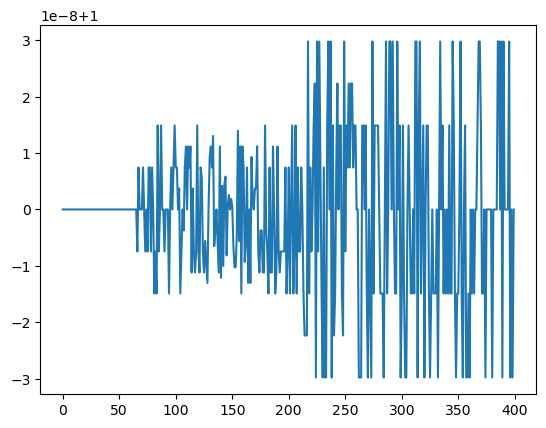

In [ ]:
import numpy as np
plt.plot(np.array(pinn.params_history["w_BC"])+np.array(pinn.params_history["w_PDE"])+np.array(pinn.params_history["w_data"]))